# Análisis Exploratorio de los Datos

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Carga de la base de datos
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
'''Lista de modafokers
1. Mr. -> Señor, jovenes hombres (Desde los 14 años son Mr.)
2. Miss -> Señoritas Jovenes
3. Mrs. -> Mujeres casadas --female
4. Master -> Niños varones (por ahí hay uno de 11 años xd)
5. Doctor -> Hombres adultos (doctores xd)
6. Capt. -> Capitán (señor adulto)
7. Mlle. -> Madmoiselle (Jovenes mujeres, generalmente de primera clase)
8. Col. -> Coronel
9. Rev. -> Reverendo (padrecito)
10. Major -> Señor mamon
11. Mme -> Madame (joven mujer por lo general)
12. Don -> Igual a Mr.
13. Ms
14. Lady.
15. Sir.
16. Countess
17. Jonkheer
'''
# categorizar edades
# groupby(NuevoNombrexdxdxddddd)

'Lista de modafokers\n1. Mr. -> Señor, jovenes hombres (Desde los 14 años son Mr.)\n2. Miss -> Señoritas Jovenes\n3. Mrs. -> Mujeres casadas --female\n4. Master -> Niños varones (por ahí hay uno de 11 años xd)\n5. Doctor -> Hombres adultos (doctores xd)\n6. Capt. -> Capitán (señor adulto)\n7. Mlle. -> Madmoiselle (Jovenes mujeres, generalmente de primera clase)\n8. Col. -> Coronel\n9. Rev. -> Reverendo (padrecito)\n10. Major -> Señor mamon\n11. Mme -> Madame (joven mujer por lo general)\n12. Don -> Igual a Mr.\n'

In [93]:
#Creando nueva columna para la variable nombre
titanic['Name_Pref']=np.nan

#LLenado de la variable
lista_pref=['Mr.','Miss.','Mrs.','Master.','Dr.','Capt.','Mlle.','Col.','Rev.','Major.','Mme.','Don.','Ms.','Lady.','Sir.','Countess.','Jonkheer.']
for i in range(len(titanic)):
    for j in lista_pref:
        if j in titanic['Name'][i]:
            titanic['Name_Pref'][i]=j

C:\Users\perezm47\AppData\Local\Temp/ipykernel_5892/2252012886.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Name_Pref'][i]=j
C:\Users\perezm47\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [94]:
titanic[titanic['Name_Pref'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Pref


In [95]:
titanic['Name_Pref'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Name_Pref, dtype: int64

In [101]:
titanic.groupby("Name_Pref")["Age"].mean()

Name_Pref
Capt.        70.000000
Col.         58.000000
Countess.    33.000000
Don.         40.000000
Dr.          42.000000
Jonkheer.    38.000000
Lady.        48.000000
Major.       48.500000
Master.       4.574167
Miss.        21.773973
Mlle.        24.000000
Mme.         24.000000
Mr.          32.368090
Mrs.         35.898148
Ms.          28.000000
Rev.         43.166667
Sir.         49.000000
Name: Age, dtype: float64

In [16]:
pd.DataFrame(titanic['Cabin'].value_counts())

,Cabin
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1
E36,1


In [86]:
# Información de la base de datos
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Name_Pref    886 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [19]:
# Estadística descriptiva de las variables numéricas
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Graficas básicas

In [20]:
titanic.groupby(by='Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [21]:
titanic.groupby(by='Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


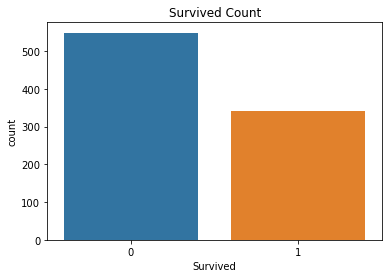

In [22]:
sns.countplot(data=titanic, x='Survived')
sns.set_palette('Set1')

plt.title('Survived Count')
plt.xlabel('Survived')

plt.show()

Text(0.5, 1.0, 'Passengers status vs gender')

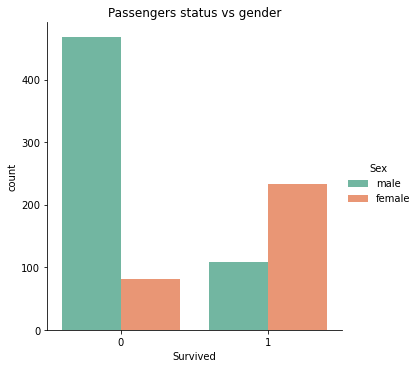

In [23]:
sns.set_palette('Set2')
sns.catplot(x = "Survived", data = titanic, kind = "count", hue = "Sex");
plt.title('Passengers status vs gender')

Text(0.5, 1.0, 'Passengers status vs Passenger class')

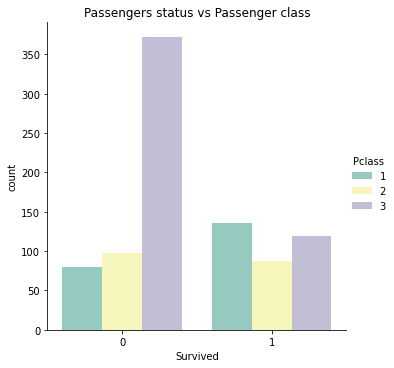

In [24]:
sns.set_palette('Set3')
sns.catplot(x = "Survived", data = titanic, kind = "count", hue = "Pclass");
plt.title('Passengers status vs Passenger class')

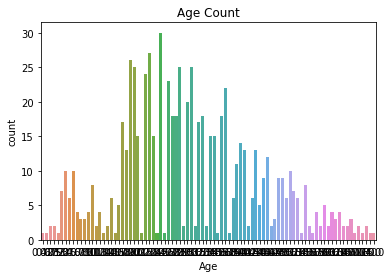

In [25]:
sns.countplot(data=titanic, x='Age')
sns.set_palette('Set1')
plt.title('Age Count')
plt.xlabel('Age')
plt.show()

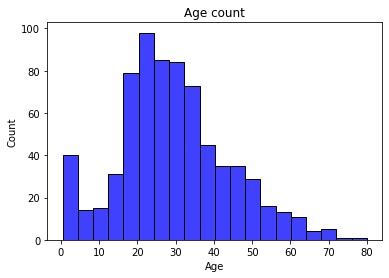

In [26]:
sns.histplot(data = titanic, x = 'Age', color = 'blue')
plt.title('Age count')
plt.xlabel('Age')
plt.show()

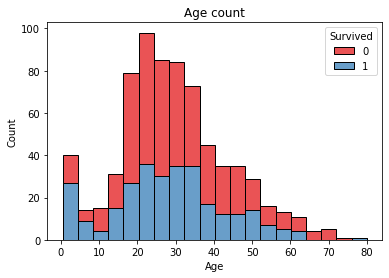

In [27]:
sns.histplot(data = titanic, x = 'Age', color = 'blue', hue = 'Survived', multiple="stack")
plt.title('Age count')
plt.xlabel('Age')
plt.show()

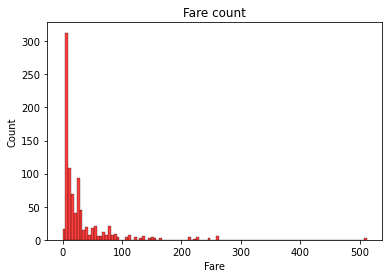

In [28]:
sns.histplot(data = titanic, x = 'Fare', color = 'red')
plt.title('Fare count')
plt.xlabel('Fare')
plt.show()

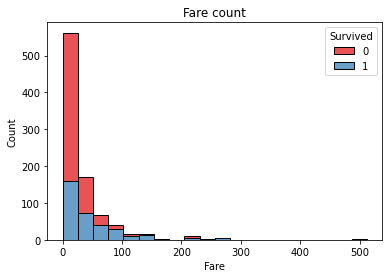

In [29]:
sns.histplot(data = titanic, x = 'Fare', color = 'red', hue = 'Survived', multiple="stack", bins = 20)
plt.title('Fare count')
plt.xlabel('Fare')
plt.show()

## Valores nulos

In [30]:
# Número de datos nulos por feature
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Se observa que el número de cabina (`Cabin`) de los pasajeros cuenta con muy pocas registros, pues la mayoría son nulos. Por lo tanto, se decide eliminar dicha variable, ya que además no es una variable relevante para construir el modelo. De igual forma se eliminan las variables `PassengerId` y `Ticket` ya que es una variable que únicamente sirve para llevar un orden 

### Eliminación de columna `Cabin`, `Ticket` y `PassengerId` 

In [31]:
titanic.drop(['Cabin', 'Ticket','PassengerId'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [32]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


### Análisis `Age`

In [33]:
pd.DataFrame(titanic['Age'].value_counts())

,Age
24.00,30
22.00,27
18.00,26
19.00,25
28.00,25
...,...
36.50,1
55.50,1
0.92,1
23.50,1


In [34]:
titanic[titanic['Age'] == 0.92] 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
305,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.55,S


In [35]:
## Se truncan las edades al entero más bajo
titanic['Age'] = titanic['Age'].apply(np.floor)

In [36]:
titanic[titanic['Age'] == 0.92] 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


In [37]:
## Pasajeros sin edad
sin_edad = titanic.loc[titanic['Age'].isnull()]
sin_edad

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,7.2292,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.5500,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,9.5000,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,7.8958,S


In [38]:
titanic[titanic['Name'] == 'Moran, Mr. James']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q


In [41]:
## Remplazar los valores nulos de edad por la media de dicha variable
from sklearn.impute import KNNImputer

# Construimos el modelo
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Ajustamos el modelo e imputamos los missing values
imputer.fit(titanic[["Age"]])
titanic["Age"] = imputer.transform(titanic[["Age"]]).ravel()

print("Valores perdidos en Age: " + 
      str(titanic['Age'].isnull().sum()))

Valores perdidos en Age: 0


In [42]:
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [43]:
titanic.shape

(891, 9)

### Eliminación de registros con valores nulos
Finalmente eliminamos aquellos registros con valores nulos en la variable `Embarked`

In [44]:
titanic = titanic.dropna()
titanic.shape

(889, 9)

## Valores Atípicos

In [45]:
def detectorAtipicos(variable):
    q1 = np.percentile(titanic[variable], 25)
    q3 = np.percentile(titanic[variable], 75)
    mu = titanic[variable].mean()
    sigma = titanic[variable].std()
    
    return titanic.loc[(titanic[variable] > q3 + 1.5*sigma) | (titanic[variable] < q1 - 1.5*sigma)]

In [46]:
detectorAtipicos('Age').shape

(65, 9)

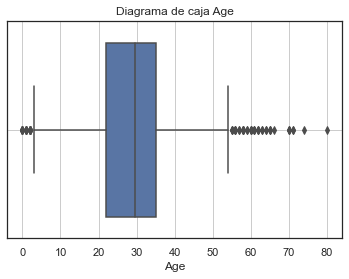

In [47]:
sns.set_theme(style='white')
ax = sns.boxplot(x=titanic['Age'])
plt.title('Diagrama de caja Age')
plt.grid()

In [48]:
detectorAtipicos('Fare').shape

(53, 9)

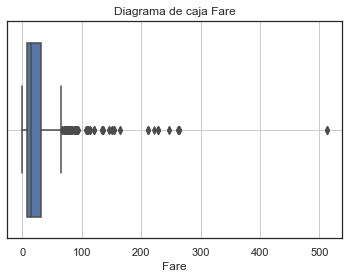

In [49]:
ax = sns.boxplot(x=titanic['Fare'])
plt.title('Diagrama de caja Fare')
plt.grid()

In [50]:
detectorAtipicos('SibSp').shape

(46, 9)

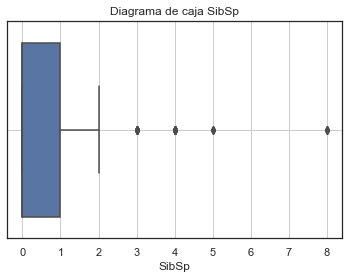

In [51]:
ax = sns.boxplot(x=titanic['SibSp'])
plt.title('Diagrama de caja SibSp')
plt.grid()

In [52]:
detectorAtipicos('Parch').shape

(95, 9)

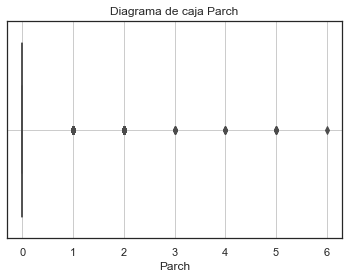

In [53]:
ax = sns.boxplot(x=titanic['Parch'])
plt.title('Diagrama de caja Parch')
plt.grid()

## Correlación

In [54]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# 0: female
# 1: male

# 0: C
# 1: Q
# 2: S

titanic['Sex'] = encoder.fit_transform(titanic['Sex'])
titanic['Embarked'] = encoder.fit_transform(titanic['Embarked'])
titanic.head()

C:\Users\Iker\AppData\Local\Temp\ipykernel_15912\199970570.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.com/v3/__https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html*returning-a-view-versus-a-copy*5Cn__;IyU!!M7dyoZOwuwF45AU!jNt6ko6rPAMVZzqTNatxG6cKt9C_7NRrMi51kVa_iXRsXhH_SwjiYRb_aSpICpYvYM-txQ$   titanic['Sex'] = encoder.fit_transform(titanic['Sex'])
C:\Users\Iker\AppData\Local\Temp\ipykernel_15912\199970570.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.com/v3/__https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html*returning-a-view-versus-a-copy*5Cn__;IyU!!M7dyoZOwuwF45AU!jNt6ko6rPAMVZzqTNatxG6cKt9C_7NRrMi51kVa_iXRsXhH_SwjiY

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


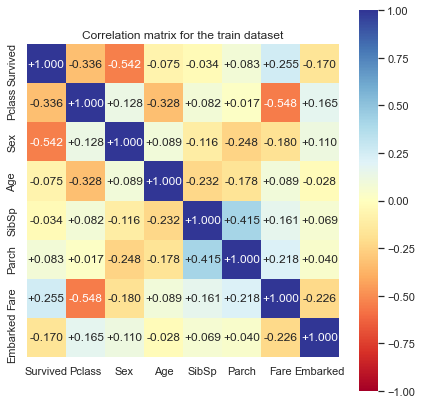

In [55]:
plt.figure(figsize=(7,7))
sns.heatmap(titanic.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix for the train dataset")
plt.show()

## Implementación de modelo "Decision Tree Clasiffier"

### Modelo base

In [56]:
## Import dependecies
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

x_train = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = titanic['Survived']

In [57]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.679272,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [58]:
# Se guarda el modelo en una variable
clf = DecisionTreeClassifier()

# Se entrena el modelo de árbol de decisión
clf = clf.fit(x_train,y_train)


## Carga del set de prueba


In [59]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [60]:
test['Sex'] = encoder.fit_transform(test['Sex'])
test['Embarked'] = encoder.fit_transform(test['Embarked'])
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


In [61]:
media_age = np.floor(test['Age'].mean())
test['Age'] = test['Age'].fillna(media_age)

media_fare = np.floor(test['Fare'].mean())
test['Fare'] = test['Fare'].fillna(media_fare)

In [62]:
x_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [69]:
x_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [70]:
# Se realizan predicciones con el set de prueba
y_pred = clf.predict(x_test)

In [71]:
ids = np.arange(892, 1310)


In [72]:


resultados = pd.DataFrame(test['PassengerId'])
resultados

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [73]:
resultados['Survived'] = y_pred
resultados

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [71]:
resultados.to_csv('Results.csv')